## Shubham Bhatt
## Task-Prediction using Supervised ML
Predict the percentage of an student based on the no. of study hours.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
study_data=pd.read_csv("beg_study_data.csv")

In [3]:
study_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
study_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#student with marks greater then 60
study_data[study_data['Scores']>60]

,Hours,Scores
3,8.5,75
6,9.2,88
8,8.3,81
10,7.7,85
11,5.9,62
15,8.9,95
18,6.1,67
19,7.4,69
23,6.9,76
24,7.8,86


In [6]:
X=study_data.drop('Scores',axis=1)
y=study_data['Scores']

Relationship Between Hours and Scores

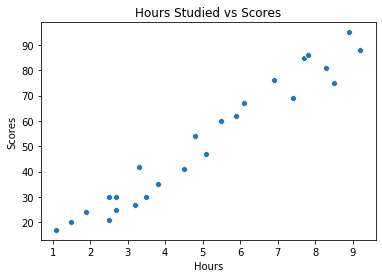

In [7]:
sns.scatterplot(x='Hours',y='Scores',data=study_data)
plt.title("Hours Studied vs Scores")
plt.show()

Spllitting the dataset

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42) 

In [9]:
X_train

,Hours
9,2.7
13,3.3
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5


In [10]:
y_train

9     25
13    42
1     47
22    35
5     20
2     27
12    41
15    95
3     75
4     30
20    30
17    24
21    54
18    67
24    86
7     60
10    85
14    17
19    69
6     88
Name: Scores, dtype: int64

In [11]:
X_test

,Hours
8,8.3
16,2.5
0,2.5
23,6.9
11,5.9


Predicting Scores

In [12]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
pred=lreg.predict(X_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


In [14]:
lreg.score(X_test,y_test)

0.9678055545167994

Plotting the Graphs

In [15]:
print(lreg.coef_,lreg.intercept_)
line=X* lreg.coef_ + lreg.intercept_

[9.68207815] 2.826892353899737


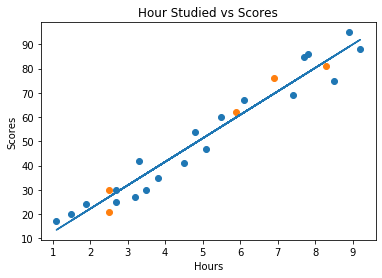

In [16]:
plt.scatter(X_train, y_train)
plt.scatter(X_test,y_test) #orange points
plt.plot(X,line)
plt.title("Hour Studied vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

Alternatively we can use Regplot for the regression line .

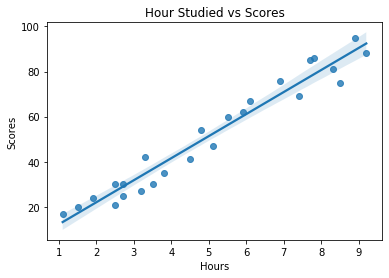

In [17]:
sns.regplot(X,y)
plt.title("Hour Studied vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

What will be predicted score if a student studies for 9.25 hrs/ day?

In [18]:
print("Studying for 9.25 hours will provide the student with ",lreg.predict([[9.25]])[0],'marks')

Studying for 9.25 hours will provide the student with  92.38611528261494 marks
